# Analysis for the learning of the 2D dynamics with constant wind of 20m/s and the attack angle (alpha) as only state

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams["figure.figsize"] = (10,7)

alphas = [-8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 19, 20]
n_alphas = len(alphas)
n_actions = 3

fs = 15
title_fs = 17
label_fs = 13
legend_fs = 11

## 1) Q matrix

In [2]:
cQ = pd.read_csv("cQ_matrix.txt")
pQ = pd.read_csv("pQ_matrix.txt")

pQ.head(4)

,episode,alpha_idx,action_0,action_1,action_2
0,0,0,0.000000,3995.847689,4000.003178
1,0,1,4000.005531,4000.000000,4000.000000
2,0,2,4000.002375,4000.000000,4000.000000
3,0,3,4000.002405,4000.000000,4000.000000


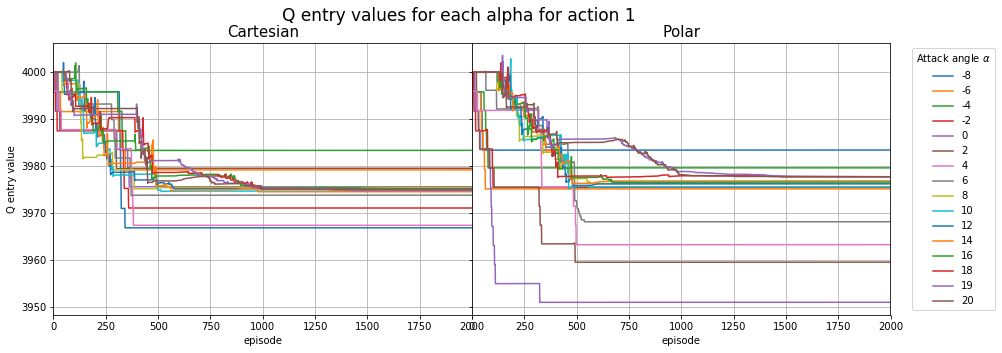

In [3]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15, 5), gridspec_kw={'wspace': 0})

ep_max = cQ['episode'].max()
chosen_action = 1

for alph, val in enumerate(alphas):
    
    fig.suptitle("Q entry values for each alpha for action " + str(chosen_action), fontsize = title_fs)
         
    df = cQ.loc[cQ['alpha_idx'] == alph]
    axs[0].plot(df['episode'], df['action_'+str(chosen_action)], label = str(alphas[alph]))
    axs[0].grid(b=True)

    df = pQ.loc[pQ['alpha_idx'] == alph]
    axs[1].plot(df['episode'], df['action_'+str(chosen_action)],  label = str(alphas[alph]))
    axs[1].grid(b=True)

    plt.legend(title = 'Attack angle ' + r'$\alpha$', bbox_to_anchor=(1.04,1), loc="upper left")
    
    axs[0].set_ylabel('Q entry value')
    axs[0].set_xlim(0,ep_max)

    axs[0].set_title("Cartesian", fontsize = fs)
    axs[1].set_title("Polar", fontsize = fs)
    
for ax in axs.flat:
    ax.set(xlabel='episode')
    

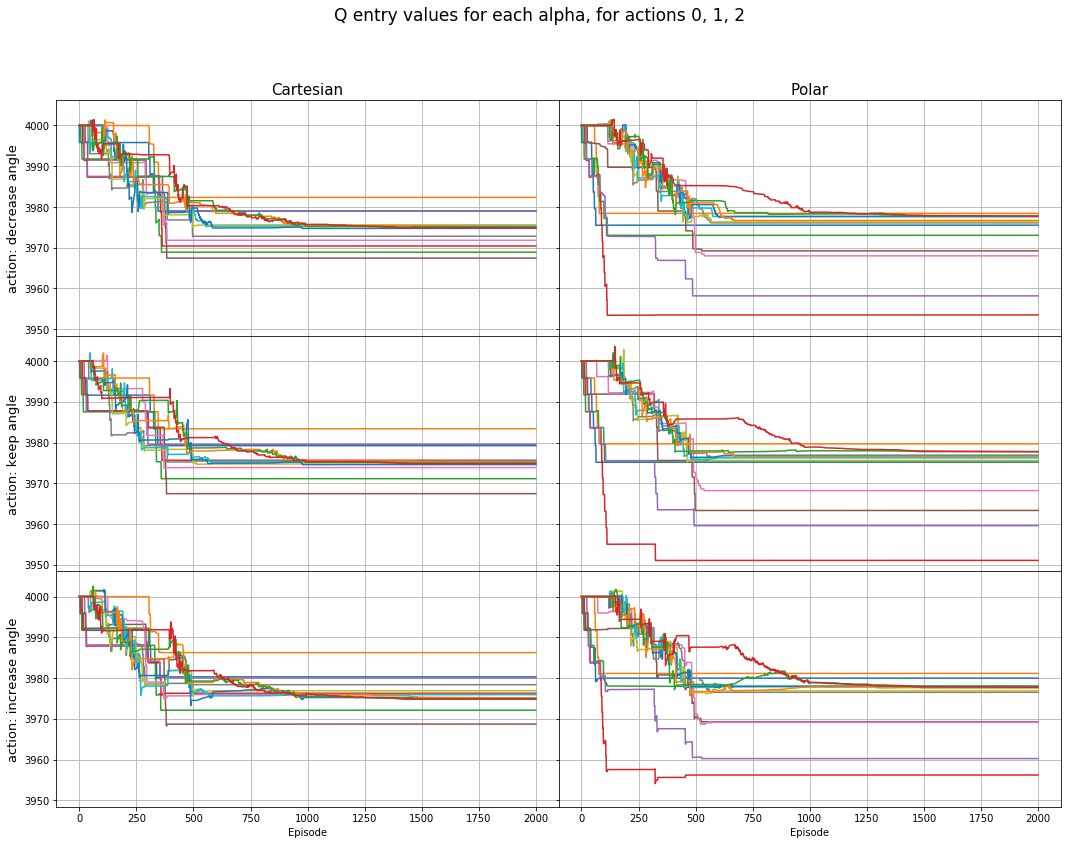

In [4]:
fig, axs = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(18, 13), gridspec_kw={'wspace': 0, 'hspace':0})
(ax1, ax2), (ax3, ax4), (ax5, ax6) = axs
ep_max = cQ['episode'].max()

actions = ['action_0', 'action_1', 'action_2']

fig.suptitle("Q entry values for each alpha, for actions 0, 1, 2 ", fontsize = title_fs)

for alph in range(1,15):
    
    df = cQ.loc[cQ['alpha_idx'] == alph]

    ax1.plot(df['episode'], df['action_0'], label = str(alphas[alph]))
    ax3.plot(df['episode'], df['action_1'], label = str(alphas[alph]))
    ax5.plot(df['episode'], df['action_2'], label = str(alphas[alph]))
    
    ax1.set_ylabel('action: decrease angle', fontsize = label_fs)
    ax3.set_ylabel('action: keep angle', fontsize = label_fs)
    ax5.set_ylabel('action: increase angle', fontsize = label_fs)

    df = pQ.loc[pQ['alpha_idx'] == alph]
    
    ax2.plot(df['episode'], df['action_0'], label = str(alphas[alph]))
    ax4.plot(df['episode'], df['action_1'], label = str(alphas[alph]))
    ax6.plot(df['episode'], df['action_2'], label = str(alphas[alph]))

ax1.set_title("Cartesian", fontsize = fs)
ax2.set_title("Polar", fontsize = fs)
    
for ax in axs.flat:
    ax.set(xlabel='Episode')
    
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax5.grid()
ax6.grid()

## 2) Rewards

In [5]:
crew = pd.read_csv("crewards.txt", header = None, delim_whitespace=True)
prew = pd.read_csv("prewards.txt", header = None, delim_whitespace=True)

crew.head(3)

,0,1
0,0,75.551064
1,1,116.851285
2,2,95.457305


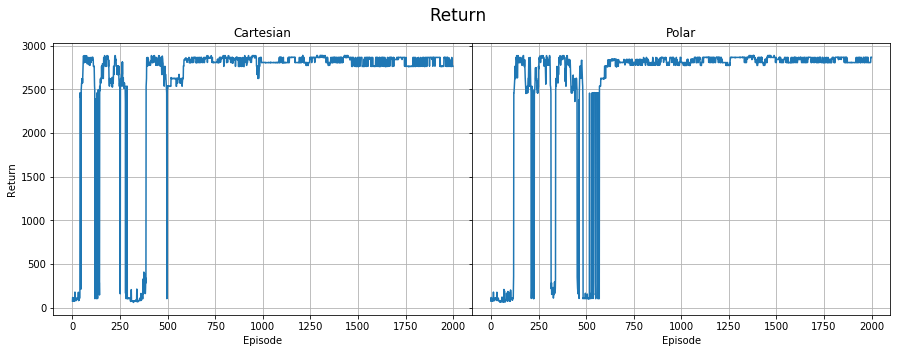

In [6]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15, 5), gridspec_kw={'wspace': 0})

fig.suptitle("Return", fontsize = title_fs)

axs[0].plot(crew[0], crew[1])
axs[0].grid(b=True)

axs[1].plot(prew[0], prew[1])
axs[1].grid(b=True)

#axs[0].legend(title = r'Wind (m/s)', fontsize = legend_fs, loc='upper left', prop={"size":9})
axs[0].set_ylabel('Return')

axs[0].set_title("Cartesian")
axs[1].set_title("Polar")

for ax in axs.flat:
    ax.set(xlabel='Episode')

## Mean growth of returns

In [7]:
num_blocks = 40
data_per_block = int(len(crew)/num_blocks)

cmean = []
pmean = []
for i in range(0,num_blocks):
    #print(i*n_data,i*n_data+n_data)
    cmean.append(np.mean(crew[1][i*data_per_block:i*data_per_block+data_per_block]))
    pmean.append(np.mean(prew[1][i*data_per_block:i*data_per_block+data_per_block]))

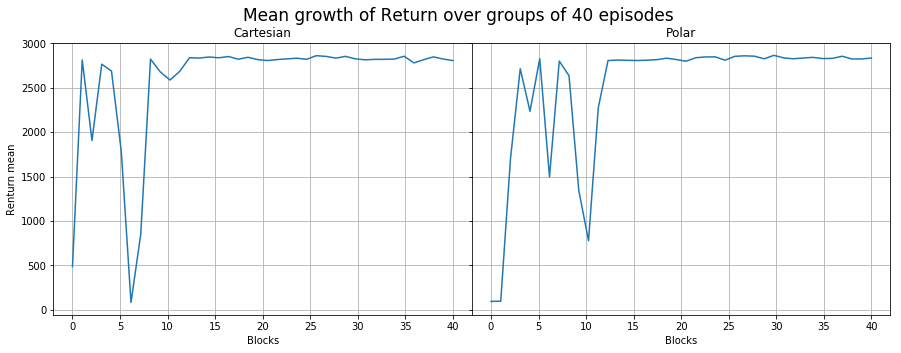

In [8]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15, 5), gridspec_kw={'wspace': 0})

fig.suptitle('Mean growth of Return over groups of ' + str(num_blocks) + ' episodes', fontsize = title_fs)

axs[0].plot(np.linspace(0, num_blocks, num_blocks), cmean)
axs[0].grid(b=True)

axs[1].plot(np.linspace(0, num_blocks, num_blocks), pmean)
axs[1].grid(b=True)

axs[0].set_ylabel('Renturn mean')

axs[0].set_title("Cartesian")
axs[1].set_title("Polar")

for ax in axs.flat:
    ax.set(xlabel='Blocks')

## 3) Last iteration Policy

In [9]:
cpol = pd.read_csv("cpolicy.txt", delim_whitespace=True)
ppol = pd.read_csv("ppolicy.txt", delim_whitespace=True)

cpol.head(3)

,step,alpha,action,reward,Q[s+0],Q[s+1],Q[s+2]
0,0,12.0,2,0.000000,3975.321314,3975.236851,3975.965755
1,1000,14.0,2,2.025166,3974.749591,3974.589043,3975.031879
2,2000,16.0,2,2.234321,3975.146274,3975.141528,3975.137912


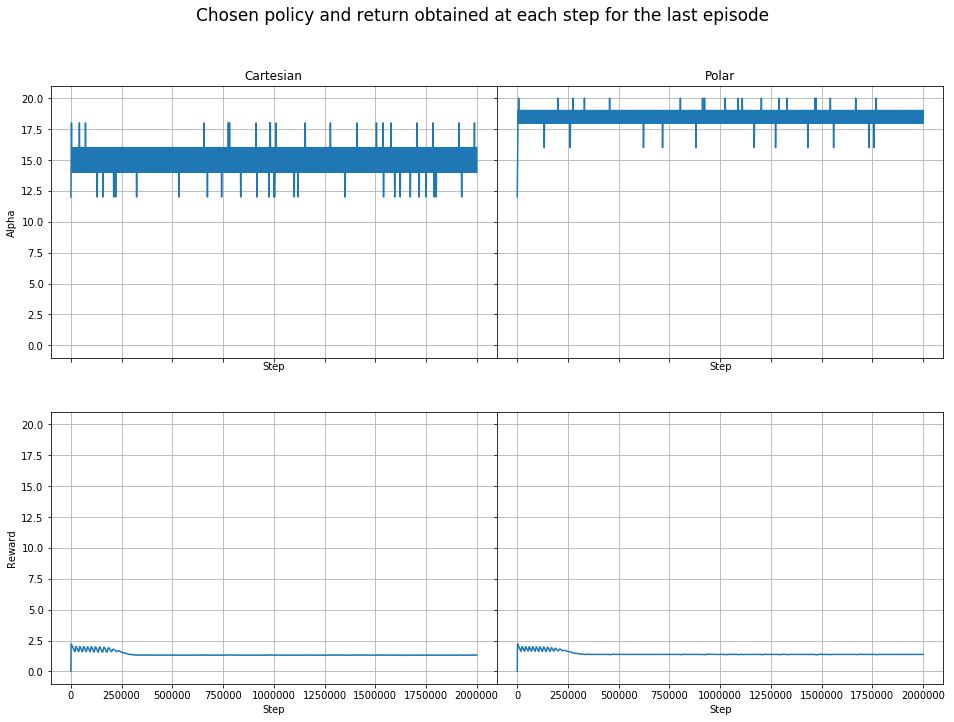

In [10]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(16, 11), gridspec_kw={'wspace': 0})
(ax1, ax2), (ax3, ax4) = axs

fig.suptitle("Chosen policy and return obtained at each step for the last episode", fontsize = title_fs)

ax1.plot(cpol['step'], cpol['alpha'])
ax2.plot(ppol['step'], ppol['alpha'])

ax3.plot(cpol['step'], cpol['reward'])
ax4.plot(ppol['step'], ppol['reward'])

ax1.set_ylabel('Alpha')
ax3.set_ylabel('Reward')

ax1.set_title("Cartesian")
ax2.set_title("Polar")

for ax in axs.flat:
    ax.set(xlabel='Step')
    
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

## 4) last episode dynamics plot

In [11]:
cout = pd.read_csv("cout.txt", delim_whitespace=True)
pout = pd.read_csv("pout.txt", delim_whitespace=True)

cout.head(3)

,t,x_kite,z_kite,x_block,z_block,wind_x,wind_y,v_block_x
0,0,50.000000,0.001016,0.000000,0.0,20.0,0.0,0.003042
1,1000,50.603769,3.329453,0.714744,0.0,20.0,0.0,20.277792
2,2000,52.593150,6.100672,2.966728,0.0,20.0,0.0,22.336048


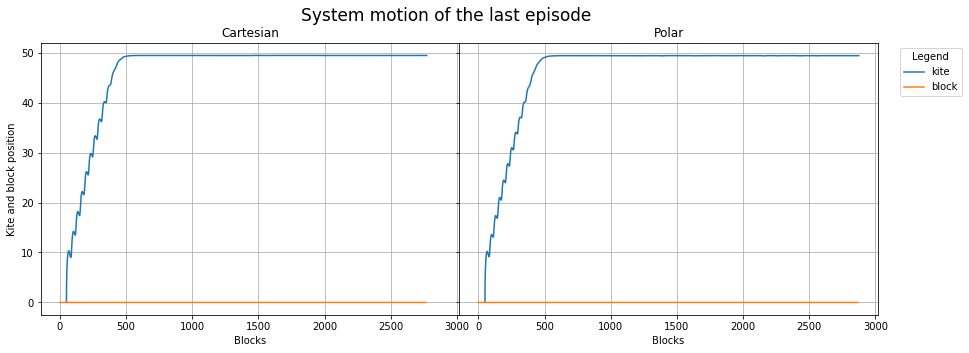

In [12]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15, 5), gridspec_kw={'wspace': 0})

fig.suptitle('System motion of the last episode', fontsize = title_fs)

axs[0].plot(cout['x_kite'], cout['z_kite'],label='kite')
axs[0].plot(cout['x_block'], cout['z_block'],label='block')
axs[0].grid(b=True)

axs[1].plot(pout['x_kite'], pout['z_kite'],label='kite')
axs[1].plot(pout['x_block'], pout['z_block'],label='block')
axs[1].grid(b=True)

plt.legend(title = 'Legend', bbox_to_anchor=(1.04,1), loc="upper left")
        
axs[0].set_ylabel('Kite and block position')

axs[0].set_title("Cartesian")
axs[1].set_title("Polar")

for ax in axs.flat:
    ax.set(xlabel='Blocks')